In [1]:
import pandas as pd
yr20_old = pd.read_csv('../codoxer/data/gcj-dataset-master/gcj2020.csv')
yr20_one = pd.read_csv('../codoxer/data/oneforone_2020.csv')
yr20 = pd.read_csv('../codoxer/data/gcj_data_select.csv')
yr20.head()

/Users/freddy/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,year,username,task,flines,language
0,2008,.Invader,24437,import java.io.*;\n import java.util.*;\n \n p...,java
1,2008,A.I,24437,#include <vector>\n #include <list>\n #include...,cpp
2,2008,AdrianKuegel,24437,// Adrian Kgel\n #include <stdio.h>\n #include...,cpp
3,2008,Akim,24437,#include <cstdio>\n #include <iostream>\n usin...,cpp
4,2008,Al.Cash,24437,#include <iostream>\n #include <sstream>\n #in...,cpp


In [2]:
yr20.columns

Index(['year', 'username', 'task', 'flines', 'language'], dtype='object')

In [3]:
#df = yr20.drop(columns= ['Unnamed: 0', 'file', 'year'])

In [4]:
df = yr20.drop(columns = ['task', 'year'])

In [5]:
#df = yr20.drop(columns= ['Unnamed: 0', 'full_path', 'round', 'solution', 'task', 'year'])

In [6]:
import regex as re

In [7]:
#df['lan'] = df['full_path'].apply(lambda x: x.split('.')[-1].lower())

In [8]:
df = df[df.language.isin(['cpp', 'python', 'java'])]

In [9]:
df['code_length'] = df['flines'].apply(lambda x: len(x))

In [10]:
df['n_loops'] = df.flines.apply(lambda x: (x.count('for') + x.count('while')) / len(x) )

In [11]:
df['n_imports'] = df.flines.apply(lambda x: (x.count('#include') + x.count('import')) / len(x) )

In [12]:
df['n_contols'] = df.flines.apply(lambda x: (x.count('if') + x.count('else') + x.count('elif')) / len(x) )

In [13]:
df['n_assigns'] = df.flines.apply(lambda x: (x.count('=') - x.count('==') - x.count('<=') - x.count('>=') - x.count('!=')) / len(x))

In [14]:
df['n_asserts'] = df.flines.apply(lambda x: x.count('assert') / len(x))

In [15]:
df['has_main'] = df.flines.apply(lambda x: min(x.count('main()'), 1))

In [16]:
df['n_newlines'] = df.flines.apply(lambda x: x.count('\n') / len(x))

In [17]:
df['n_whitespace'] = df.flines.apply(lambda x: x.count(' ') / len(x))

In [18]:
def count_comments(language, code):
    if language == 'cpp':
        return code.count('//') + code.count('/*') + code.count('*/')
    if language == 'python':
        return code.count('#') + code.count('"""')
    if language == 'java':
        return code.count('//') + code.count('/*') + code.count('*/') + code.count('/**') + code.count('/**')

In [19]:
df['n_comments'] = df.apply(lambda x: count_comments(x['language'], x['flines']) / len(x), axis = 1)

In [20]:
df['n_camelCase'] = df.flines.apply(lambda x: sum(1 for m in re.finditer(r'[a-z][A-Z]', x)) / len(x))

In [21]:
df['n_lines'] = df.flines.apply(lambda x: sum(1 for m in re.finditer(r'[^#\/]+', x)) / len(x))

In [22]:
df['outputs'] = df.flines.apply(lambda x: (x.count('cout') + x.count('print(') + x.count('print ') + x.count('.print')) / len(x))

In [23]:
#df['n_lines'] = df.flines.apply(lambda x: sum(1 for m in re.finditer(r'[\n\t].{1}[\n\t]', x)))


In [24]:
#df['n_underscore'] = df.flines.apply(lambda x: x.count('_') / len(x))

In [25]:
df['n_snakeCase'] = df.flines.apply(lambda x: sum(1 for m in re.finditer(r'[a-zA-Z]_[a-zA-Z]', x)) / len(x))

for idx in range(len(df.iloc[6].flines)):
    if df.iloc[6].flines[idx] != df.iloc[7].flines[idx]:
        print(str(idx) + ' ' + df.iloc[6].flines[idx] + df.iloc[7].flines[idx])

In [26]:
#list(df[df.language == 'cpp'].username.value_counts().head(10).index)

In [27]:
df.username.value_counts()

bmerry                 226
pashka                 206
vepifanov              205
dzhulgakov             199
eatmore                196
Eryx                   180
misof                  176
sdya                   174
nika                   174
uwi                    172
rng..58                170
ZhukovDmitry           169
Vasyl                  169
andrewzta              167
krijgertje             167
xiaowuc1               162
tsukuno                161
Gennady.Korotkevich    153
Ahyangyi               153
darnley                152
kmjp                   152
SnapDragon             152
PavelKunyavskiy        151
Astein                 148
Burunduk1              148
Al.Cash                146
mth                    145
anton.akhi             143
tmt514                 143
sohelH                 142
                      ... 
anmol0709                1
evanda                   1
pcprateek                1
jakobjjk                 1
keymoon                  1
AnGG                     1
V

In [112]:
#data_iteration1 = df[df.language == 'cpp']
data_iteration1 = df[df.username.isin(['SnapDragon', 'eatmore'])]
#data_iteration1 = df[df.username.isin(list(df.username.value_counts().head(132).index))]

In [113]:
#print(data_iteration1.loc[441962].flines)

In [114]:
#data_iteration1.sort_values(by = 'code_length', ascending=False)

In [115]:
df.username.str.count('al13n').sum()

132

In [116]:
data_iteration1['user'] = data_iteration1.username.apply(lambda x: 1 if x == 'eatmore' else 0)


/Users/freddy/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:

data_iteration1

,username,flines,language,code_length,n_loops,n_imports,n_contols,n_assigns,n_asserts,has_main,n_newlines,n_whitespace,n_comments,n_camelCase,n_lines,outputs,n_snakeCase,user
14983,eatmore,import java.io.BufferedReader;\n import java.i...,java,2839,0.003170,0.003875,0.003522,0.013033,0.0,0,0.039803,0.166256,0.166667,0.015498,0.001761,0.002818,0.000000,1
17643,eatmore,import java.io.BufferedReader;\n import java.i...,java,1870,0.004278,0.004278,0.001604,0.015508,0.0,0,0.037968,0.142246,0.000000,0.020856,0.001070,0.000535,0.000000,1
20309,eatmore,import java.io.BufferedReader;\n import java.i...,java,1405,0.002847,0.005694,0.000712,0.010676,0.0,0,0.034875,0.126690,0.000000,0.024911,0.001423,0.000712,0.000000,1
24013,eatmore,import static java.lang.Double.parseDouble;\n ...,java,2937,0.002383,0.005107,0.003064,0.011236,0.0,0,0.038134,0.116786,0.000000,0.017365,0.000681,0.000681,0.000000,1
27290,eatmore,import java.io.BufferedReader;\n import java.i...,java,1808,0.003872,0.004978,0.001106,0.008850,0.0,0,0.037058,0.126659,0.250000,0.022677,0.002765,0.000553,0.000000,1
28037,eatmore,import java.io.BufferedReader;\n import java.i...,java,5294,0.003022,0.002645,0.004156,0.011522,0.0,0,0.040612,0.138836,0.000000,0.018700,0.000378,0.000378,0.000000,1
28840,eatmore,import static java.lang.System.arraycopy;\n \n...,java,1654,0.003023,0.005441,0.000605,0.009674,0.0,0,0.039903,0.134825,0.000000,0.022975,0.001209,0.000605,0.000000,1
31027,eatmore,import static java.lang.Math.sqrt;\n \n import...,java,4286,0.003033,0.002566,0.003500,0.015632,0.0,0,0.039197,0.173588,0.000000,0.010033,0.002566,0.000233,0.000000,1
31978,eatmore,import static java.lang.System.nanoTime;\n \n ...,java,7133,0.003785,0.001963,0.004206,0.016262,0.0,0,0.038834,0.159400,0.416667,0.009954,0.000981,0.000981,0.000000,1
34362,eatmore,import static java.lang.Integer.parseInt;\n im...,java,1560,0.001282,0.003205,0.001923,0.006410,0.0,0,0.037821,0.112179,0.000000,0.026923,0.001282,0.003846,0.000000,1


In [130]:
X = data_iteration1.drop(columns = ['flines', 'username', 'language'])


y = data_iteration1.username

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.multiclass import OneVsOneClassifier

In [120]:
X.columns

Index(['code_length', 'n_loops', 'n_imports', 'n_contols', 'n_assigns',
       'n_asserts', 'has_main', 'n_newlines', 'n_whitespace', 'n_comments',
       'n_camelCase', 'n_lines', 'outputs', 'n_snakeCase', 'user'],
      dtype='object')

In [2]:
import matplotlib.pyplot as plt


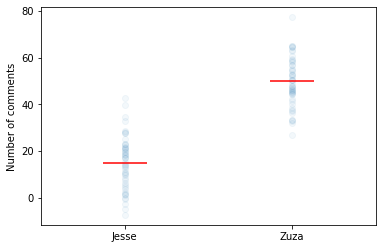

In [15]:
x = np.concatenate((np.zeros((1,50)), np.ones((1,50))))
y1 = np.random.normal(15, 10, (1,50))
y2 = np.random.normal(50, 10, (1,50))
y = np.concatenate((y1, y2))

x_m = [0, 1]
y_m = [15, 50]

plt.scatter(x, y, alpha = .05)
plt.scatter(x_m, y_m, marker = '_', color = 'r', s = 2000)
plt.ylabel('Number of comments')
plt.xticks([0.0, 1.0], ['Jesse', 'Zuza'])
plt.xlim(left = -.5, right = 1.5)
plt.show()

sns.pairplot(X)

In [123]:
#X.user.value_counts()

In [124]:
#X = X.drop(columns = 'user')

In [125]:
X.columns

Index(['code_length', 'n_loops', 'n_imports', 'n_contols', 'n_assigns',
       'n_asserts', 'has_main', 'n_newlines', 'n_whitespace', 'n_comments',
       'n_camelCase', 'n_lines', 'outputs', 'n_snakeCase', 'user'],
      dtype='object')

In [126]:
cl = ColumnTransformer([('scaler', RobustScaler(), ['code_length', 'n_loops', 'n_imports', 'n_contols', 'n_assigns',
       'n_asserts', 'n_newlines', 'n_whitespace', 'n_comments',
       'n_camelCase', 'n_lines', 'outputs', 'n_snakeCase'])])

In [127]:
est = OneVsOneClassifier(LogisticRegression())

In [128]:
pipe = make_pipeline(cl, est)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [132]:
#from sklearn.model_selection import cross_val_score

#cv_score = cross_val_score(pipe, X, y, cv = 10, n_jobs = -1, verbose = 1)

In [133]:
pipe.fit(pd.DataFrame(X_train, columns=X.columns), y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['code_length', 'n_loops',
                                                   'n_imports', 'n_contols',
                                                   'n_assigns', 'n_asserts',
                                                   'n_newlines', 'n_whitespace',
                                                   'n_comments', 'n_camelCase',
                                                   'n_lines', 'outputs',
                                                   'n_snakeCase'])])),
                ('onevsoneclassifier',
                 OneVsOneClassifier(estimator=LogisticRegression()))])

In [134]:
pipe.score(X_test, y_test)

1.0

In [141]:
y_pred = pipe.predict(X_test)
y_pred.sort()

In [142]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  SnapDragon       0.59      0.59      0.59        39
     eatmore       0.67      0.67      0.67        48

    accuracy                           0.63        87
   macro avg       0.63      0.63      0.63        87
weighted avg       0.63      0.63      0.63        87



In [145]:
print(confusion_matrix(y_test, y_pred))


[[23 16]
 [16 32]]


In [139]:
df[df.username.isin(['dzhulgakov', 'vepifanov'])].sort_values(by = 'username')

,username,flines,language,code_length,n_loops,n_imports,n_contols,n_assigns,n_asserts,has_main,n_newlines,n_whitespace,n_comments,n_camelCase,n_lines,outputs,n_snakeCase
347,dzhulgakov,#include <algorithm>\n #include <string>\n #in...,cpp,2162,0.002313,0.005550,0.002775,0.010638,0.000000,1,0.044403,0.109158,0.000000,0.000000,0.017114,0.000000,0.000463
438606,dzhulgakov,#include <algorithm>\r\n#include <numeric>\r\n...,cpp,1990,0.003015,0.008040,0.002010,0.007538,0.000000,1,0.044724,0.076884,0.166667,0.000000,0.022111,0.000000,0.002010
146560,dzhulgakov,#define _CRT_SECURE_NO_WARNINGS\n #include <al...,cpp,1889,0.003176,0.007941,0.000529,0.007411,0.000529,1,0.046585,0.116993,0.000000,0.000000,0.021175,0.000000,0.002647
148325,dzhulgakov,#define _CRT_SECURE_NO_WARNINGS\n #include <al...,cpp,2456,0.002036,0.006107,0.002036,0.009365,0.000407,1,0.049674,0.114821,0.000000,0.000000,0.016287,0.000000,0.002036
435760,dzhulgakov,#include <algorithm>\r\n#include <numeric>\r\n...,cpp,2244,0.003119,0.007130,0.002228,0.009358,0.000000,1,0.047683,0.076649,0.166667,0.000000,0.018717,0.000000,0.001783
159313,dzhulgakov,#define _CRT_SECURE_NO_WARNINGS\n #include <al...,cpp,1972,0.003043,0.007606,0.002535,0.007099,0.000507,1,0.046653,0.130832,0.000000,0.000000,0.019777,0.000000,0.002535
160645,dzhulgakov,#define _CRT_SECURE_NO_WARNINGS\n #include <al...,cpp,2478,0.003228,0.006053,0.001614,0.012914,0.000404,1,0.044794,0.123083,0.000000,0.000000,0.016949,0.000000,0.002825
433225,dzhulgakov,#include <algorithm>\r\n#include <numeric>\r\n...,cpp,2579,0.002714,0.006204,0.002326,0.008918,0.000000,1,0.041877,0.077549,0.166667,0.001163,0.015898,0.000000,0.002326
161674,dzhulgakov,#define _CRT_SECURE_NO_WARNINGS\n #include <al...,cpp,2548,0.002355,0.005887,0.003140,0.007064,0.000392,1,0.049451,0.116170,0.000000,0.000000,0.015699,0.000000,0.001962
416677,dzhulgakov,#include <algorithm>\r\n#include <numeric>\r\n...,cpp,2584,0.002709,0.006192,0.002322,0.010836,0.000000,1,0.045279,0.076625,0.166667,0.000000,0.017028,0.000000,0.001548


Cluster that shit

In [ ]:
from sklearn.cluster import k_means

In [ ]:
model = k_means(X, n_clusters = 10)

In [ ]:
pd.DataFrame(model[1], data_iteration1.username).sort_index()